In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
dj_cleaned_data = os.path.join("output_data","vehicles_cleaned.csv")
dj_cleaned_df = pd.read_csv(dj_cleaned_data)

In [10]:
dj_cleaned_df.head()

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,title_status,transmission,drive,size,type,paint_color,state,lat,long,posting_date
0,0,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,...,clean,automatic,rwd,full-size,truck,black,al,32.592000,-85.51890,2021-05-03T14:02:03-0500
1,1,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,...,clean,automatic,4wd,full-size,pickup,blue,al,32.547500,-85.46820,2021-04-29T17:19:18-0500
2,2,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,...,clean,automatic,fwd,full-size,mini-van,silver,al,32.628739,-85.46182,2021-04-27T12:20:01-0500
3,3,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,...,clean,manual,rwd,full-size,truck,white,al,32.630400,-85.40160,2021-04-26T11:15:36-0500
4,4,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,...,rebuilt,automatic,rwd,mid-size,sedan,grey,al,32.822400,-85.77040,2021-04-24T18:39:59-0500


# Deon
# Analysis
* Observations based on comparing the Color of the Vehicles listed with the number of listings, prices of listings and
  manufacturer. 

In [11]:
colors_df = dj_cleaned_df['paint_color'].value_counts()
colors_df

white     17790
black     13038
silver    11058
grey       9082
blue       7414
red        6649
brown      2147
green      1851
custom     1681
yellow      438
orange      343
purple      173
Name: paint_color, dtype: int64

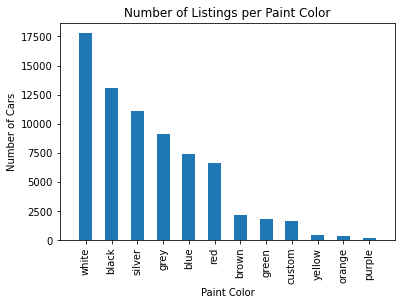

In [12]:
colors_df.plot(kind='bar')
plt.title("Number of Listings per Paint Color")
plt.xlabel("Paint Color")
plt.ylabel("Number of Cars")
plt.xlim(-1,len(colors_df.index))
plt.show()

# Observations 
* White Color Vehicles are the most listed with 17,790 listings.
* Followed by Black(13,038), Silver(11,058), Grey(9082), Blue(7414) and Red(6649) Color Vehicles.
* The Vehicle Color with the fewest listings is Purple with 173 listings. 

In [13]:
dj_price_cleaned_df = dj_cleaned_df.loc[(dj_cleaned_df['price']>=1000) & (dj_cleaned_df['price']<=200000)]
colors_price_df = dj_price_cleaned_df.groupby(['paint_color'])['price'].sum()/1000000
colors_price_df

paint_color
black     190.410112
blue       82.643580
brown      21.629381
custom     20.328524
green      18.005972
grey      115.393445
orange      5.021330
purple      1.571497
red        84.892406
silver    119.458807
white     295.811409
yellow      5.704830
Name: price, dtype: float64

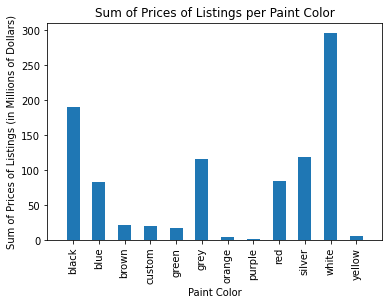

In [14]:
colors_price_df.plot(kind='bar')
plt.title("Sum of Prices of Listings per Paint Color")
plt.xlabel("Paint Color")
plt.ylabel("Sum of Prices of Listings (in Millions of Dollars)")
plt.xlim(-1,len(colors_price_df.index))
plt.show()

# Observations
* White Color Vehicles had the largest sum price of listings (USD 295.8 million).
* Followed by Black(USD 190.4 million), Silver(USD 119.5 million), Grey(USD 115.4 million), Red(USD 84.9 million) and 
  Blue(USD 82.6 million) Color Vehicles. 
* Even though there are 765 more Blue Vehicles listed than Red Vehicles, the sum price of listings of Red Vehicles is greater
  than that of Blue Vehicles by USD 2.3 million.
* The Vehicle Color with smallest sum price of listings is Purple with USD 1.6 million.

In [15]:
white_cleaned_df = dj_cleaned_df.loc[dj_cleaned_df['paint_color']=='white']
manufacturer_white_df = white_cleaned_df.groupby(['manufacturer'])['paint_color'].count()
manufacturer_white_df

manufacturer
acura             143
alfa-romeo          1
audi              124
bmw               357
buick             188
cadillac          257
chevrolet        3110
chrysler          225
dodge             424
ferrari             1
fiat               37
ford             5468
gmc               954
honda             491
hyundai           251
infiniti          107
jaguar             20
jeep              421
kia               275
land rover          1
lexus             292
lincoln           143
mazda             111
mercedes-benz     347
mercury            60
mini               78
mitsubishi        172
nissan            734
pontiac            68
porsche            28
ram               980
rover              82
saturn             37
subaru            252
tesla              13
toyota           1167
volkswagen        275
volvo              96
Name: paint_color, dtype: int64

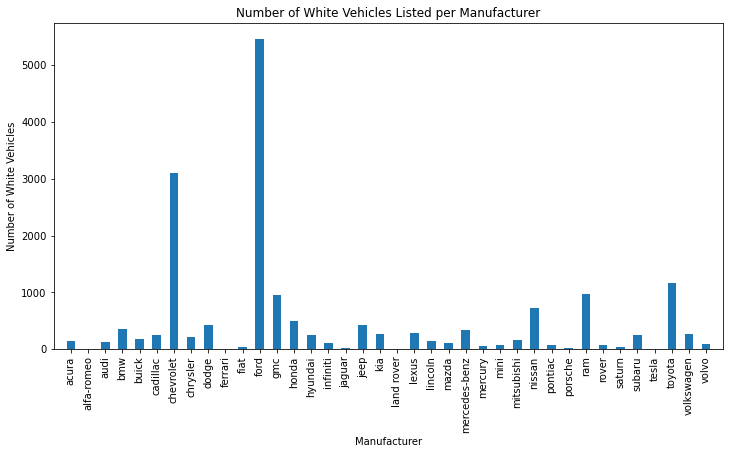

In [16]:
manufacturer_white_df.plot(kind='bar',figsize=(12,6))
plt.title("Number of White Vehicles Listed per Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of White Vehicles")
plt.xlim(-1,len(manufacturer_white_df.index))
plt.show()

# Observations
* The Vehicle Manufacturer with the largest number of White Vehicles listed is Ford with 5468 listings.
* The second largest is Chevrolet with 3110 White Vehicles Listed. 
* Both these manufacturers are American owned. 
* The third largest is Toyota with 1167 White Vehicles Listed. (Japanese Owned)